# Aviation Data Project Jupyter Notebook

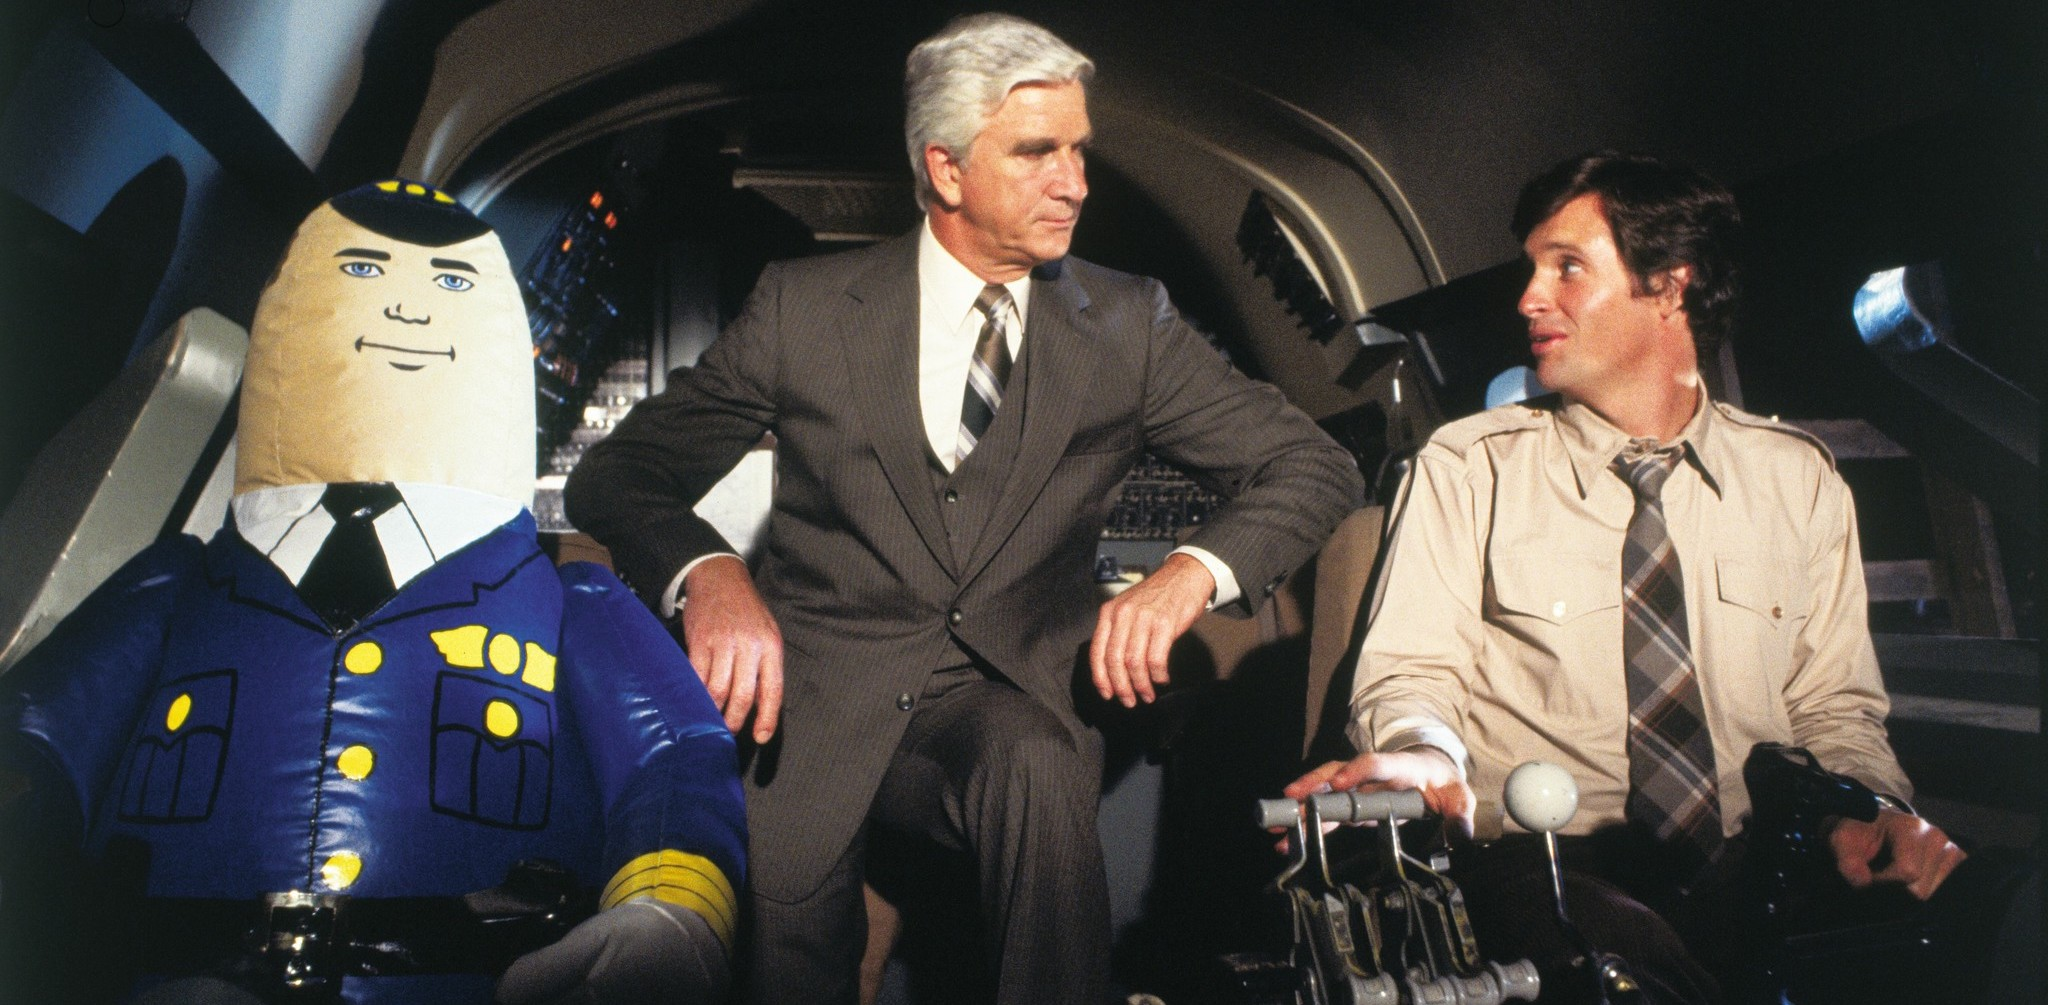

And don't call me Shirley!

## Business Problem

This is the problem our project is specifying:

`"Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase."`

In this notebook, we do the following:
- Clean the Aviation_Data.csv dataset by:
    - Removing irrelevant columns
    - Building dictionaries to fill in null values
    - Checking for duplicated records
    - Dropping irrelevant data
    - Removing some null values
    - Slicing a subset of the largest plane manufacturers
    - Creating a Year column for date filtering
- Analyze the cleaned data to provide a recommendation

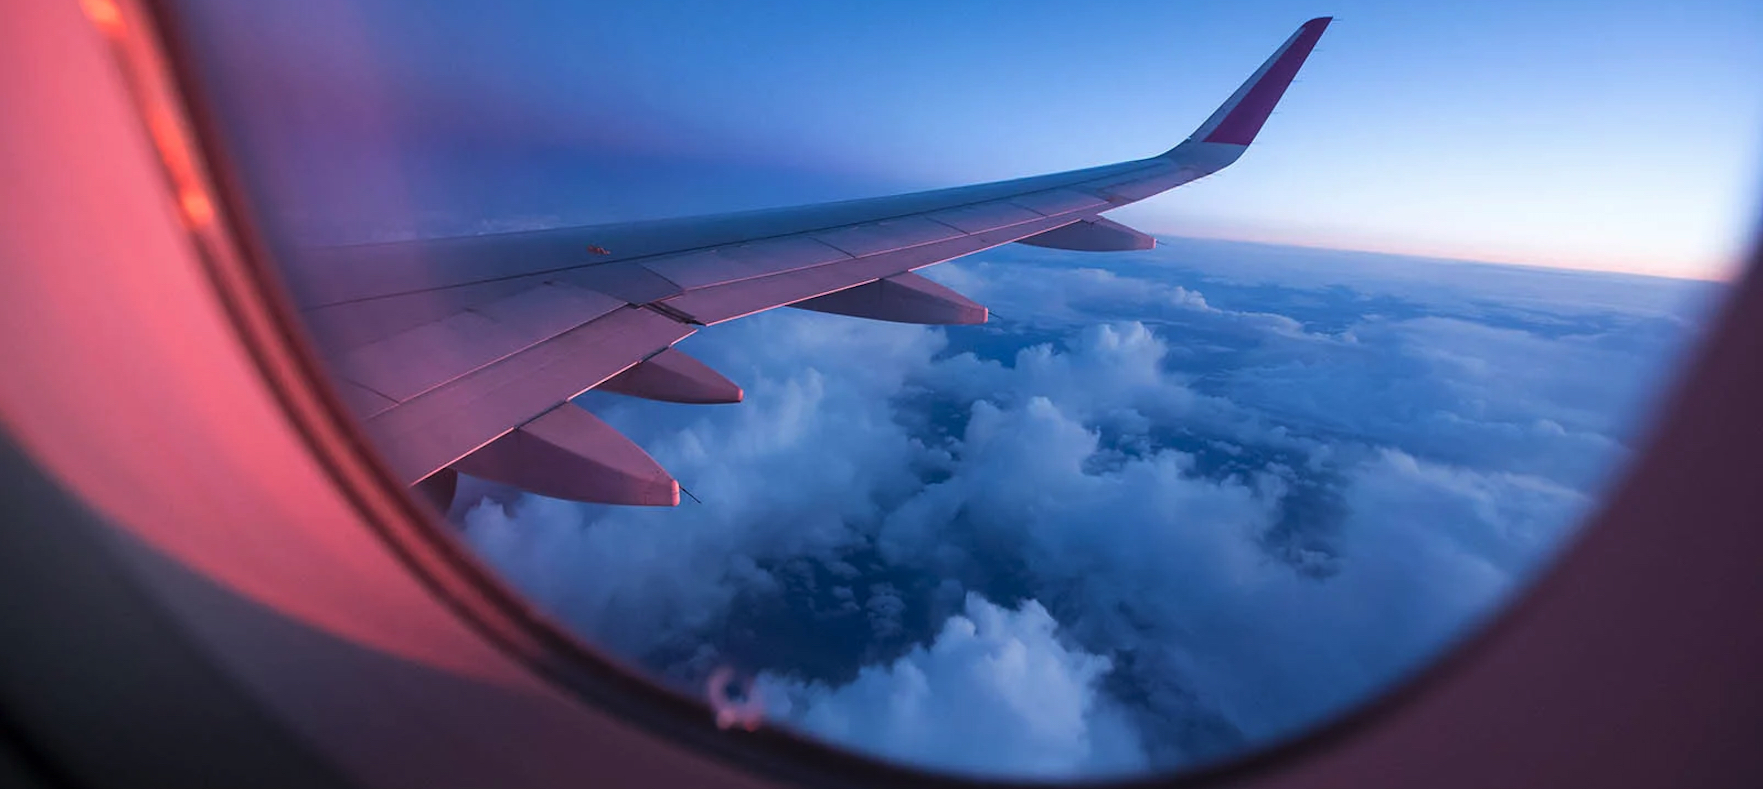

## Importing the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

We had an import issue that Nick solved by specifying the data type for columns 6, 7, and 28.

In [2]:
with open('./data/Aviation_Data.csv', encoding='utf8') as f:
    dtypes = {'Column6Name': 'str', 'Column7Name': 'str', 'Column28Name': 'str'}
    df = pd.read_csv(f, dtype=dtypes, low_memory=False)

In [3]:
df.head(2)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

Okay, so we've got 90,348 records and 31 columns. Let's clean this up a bit.

## Cleaning the Data

#### Keeping / Removing Columns for These Reasons

Keeping
- Event ID and Accident Number: Keeping for now to screen for duplicates
- Event.Date: Might be useful
- Location and Country: Might be useful
- Injury Severity, Aircraft Damage: Will be useful
- Aircraft Category: Shows many records not involving airplanes, which we can remove later
- Make and Model: Need to determine which are the safest
- Amateur Built: Can probably use to remove from data. About 8.5k out of 90 are listed as amateur built
- Number of Engines: Will need further investigation. Some show 0 engines, most show one. We would only be looking at 2+ engine planes for enterprise use
- Engine Type: Useful
- Purpose of Flight: Useful for determining cause of accident
- Total Injuries columns: Useful
- Weather Conditions: May help determine possible cause
- Report Status: May be helpful in filtering

Removing
- Investigation Type: upon doing a .values_count(), we see it is not useful
- Latitude and Longitude: mostly null, also redundant since we have Location (city, state)
- Airport.Code and Airport Name: about half null, also irrelevant to determining safety
- Registration Number: irrelevant
- FAR Description: Stands for Federal Aviation Regulation description, not useful
- Schedule: Mostly null, also irrelevant
- Air Carrier: Mostly null, also irrelevant
- Broad Phase of Flight: Enough null values for a categorical data point that we should exclude
- Publication Date: Irrelevant when data was published

In [5]:
df.drop(['Investigation.Type','Latitude', 'Longitude', 'Airport.Code', 
         'Airport.Name', 'Registration.Number', 'FAR.Description', 
         'Schedule', 'Air.carrier', 'Broad.phase.of.flight', 
         'Publication.Date'], axis=1, inplace=True)

In [6]:
df.head(2)

,Event.Id,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause


####  Drop Null Event ID's

In [7]:
df[df['Event.Id'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 64030 to 90097
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                0 non-null      object 
 1   Accident.Number         0 non-null      object 
 2   Event.Date              0 non-null      object 
 3   Location                0 non-null      object 
 4   Country                 0 non-null      object 
 5   Injury.Severity         0 non-null      object 
 6   Aircraft.damage         0 non-null      object 
 7   Aircraft.Category       0 non-null      object 
 8   Make                    0 non-null      object 
 9   Model                   0 non-null      object 
 10  Amateur.Built           0 non-null      object 
 11  Number.of.Engines       0 non-null      float64
 12  Engine.Type             0 non-null      object 
 13  Purpose.of.flight       0 non-null      object 
 14  Total.Fatal.Injuries    0 non-null 

We're getting all null values in rows where Event ID is null. Let's drop those records.

In [8]:
df.dropna(subset=['Event.Id'], inplace=True)

####  Fill in Aircraft Category, Engine Counts, and Types

Before removing any non-null records, I'd like to try to fill in some null values for Aircraft Category, Engine Count, and Engine Type by making a dictionaries of existing data by Model. 

We know our company is only looking at airplanes, so we want to exclude any records for gliders, blimps, or helicopters. 

We also might want to look at number of crashes by Engine Count or Engine Type, so the more data we have there, the better.

Let's see if this dictionary idea works.

In [9]:
# Starting number for testing

df['Aircraft.Category'].count()

32287

In [10]:
# Creating a dictionary using Model as keys and Aircraft Category (non-null) as values

engine_count_dict = df[(df['Aircraft.Category'].isna() == 
                        False)].set_index('Model')['Aircraft.Category'].to_dict()

In [11]:
# Using this dictionary to fill in some null values in Aircraft Category

df['Aircraft.Category'] = df['Aircraft.Category'].fillna(df['Model'].map(engine_count_dict))

In [12]:
# Ending number

df['Aircraft.Category'].count()

80532

Got another 48,000! Let's try for Engine Count.

In [13]:
# Starting number

df['Number.of.Engines'].count()

82805

In [14]:
# {Model: Engine Count}, then use to fill in nulls

engine_count_dict = df[(df['Number.of.Engines'].isna() == 
                        False)].set_index('Model')['Number.of.Engines'].to_dict()

df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Model'].map(engine_count_dict))

df['Number.of.Engines'].count()

87803

Got another 5,000! Now let's do this for Engine Type.

In [15]:
# Starting number

df['Engine.Type'].count()

81812

In [16]:
# {Model: Engine Type}, then use to fill in nulls

engine_type_dict = df[(df['Engine.Type'].isna() == 
                        False)].set_index('Model')['Engine.Type'].to_dict()

df['Engine.Type'] = df['Engine.Type'].fillna(df['Model'].map(engine_type_dict))

df['Engine.Type'].count()

87703

Got another 6,000!

####  Drop any non-airplane records

Time to get the scalpel!

Let's look at Aircraft Category and exclude any non-airplane records.

In [17]:
# These are the records we need to drop, making sure not to drop null values that might contain plane records.

df[(df['Aircraft.Category'] != 'Airplane') & (df['Aircraft.Category'].isna() == False)].head()

,Event.Id,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
16,20020917X01962,DEN82DTM08,1982-01-02,"MIDWAY, UT",United States,Non-Fatal,Destroyed,Helicopter,Enstrom,280C,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,IMC,Probable Cause
19,20020917X02339,MIA82DA028,1982-01-02,"MIAMI, FL",United States,Non-Fatal,Substantial,Helicopter,Smith,WCS-222 (BELL 47G),No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause
22,20020917X01657,ATL82DA027,1982-01-02,"CHAMBLEE, GA",United States,Non-Fatal,Substantial,Helicopter,Bell,206L-1,No,1.0,Turbo Shaft,Unknown,0.0,0.0,0.0,1.0,VMC,Probable Cause
46,20020917X02157,LAX82DA039,1982-01-06,"MAMMOTH LAKES, CA",United States,Non-Fatal,Substantial,Helicopter,Aerospatiale,SA-316B,No,1.0,Turbo Shaft,Business,0.0,0.0,0.0,6.0,VMC,Probable Cause
62,20020917X02247,LAX82DVG13,1982-01-09,"CALISTOGA, CA",United States,Non-Fatal,Substantial,Glider,Schleicher,ASW 20,No,0.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Probable Cause


In [18]:
# Get their indexes and drop

nonplane_indexes = df[(df['Aircraft.Category'] != 'Airplane') 
                      & (df['Aircraft.Category'].isna() == False)].index

df.drop(index=nonplane_indexes, inplace=True)

In [19]:
# Now let's drop that column

df.drop(['Aircraft.Category'], axis=1, inplace=True)

####  Drop Engine Counts Below 2

Let's look further into Engine Counts. We can probably drop all records for single engine aircraft, as our company probably will not be using prop planes. But first - what's going on with the 0 engines?

In [20]:
df['Number.of.Engines'].value_counts()

1.0    64236
2.0    12379
3.0      561
0.0      536
4.0      529
6.0        1
8.0        1
Name: Number.of.Engines, dtype: int64

In [21]:
df[df['Number.of.Engines'] == 0].head()

,Event.Id,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
1505,20020917X03932,NYC82DA121,1982-06-09,"SHREWSBURY, PA",United States,Non-Fatal,Substantial,Scheicher,K8B,No,0.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Probable Cause
3606,20001214X42064,MKC83LA051,1983-01-02,"INDIANOLA, IA",United States,Non-Fatal,NaN,Balloon Works,FIREFLY 7B,No,0.0,Unknown,Personal,0.0,1.0,0.0,1.0,VMC,Probable Cause
3659,20001214X42066,MKC83LA053,1983-01-08,"GREENWOOD, MO",United States,Non-Fatal,Substantial,Balloon Works,FIRE FLY 7-B,No,0.0,Unknown,Instructional,0.0,0.0,0.0,2.0,VMC,Probable Cause
3951,20001214X42143,ATL83LA123,1983-02-21,"WOODBINE, MD",United States,Non-Fatal,Substantial,Scheibe Flugzeugbau,L SPATZ-55,No,0.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Probable Cause
4093,20001214X42553,NYC83LA076,1983-03-12,"BUENA VISTA, PA",United States,Non-Fatal,Substantial,Burkhart Grob,G10Z ASTIR CS,No,0.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Probable Cause


With a bit of googling, we find that these are gliders and balloons. Exclude!

In [22]:
# Get their indexes and drop

engines_1and0_indexes = df[(df['Number.of.Engines'] == 0) 
                      | (df['Number.of.Engines'] == 1)].index

df.drop(index=engines_1and0_indexes, inplace=True)

####  Filter for US Data

As a brand new business line, we will likely only be operating in the US, so let's only look at US data. If want to move into international flight later, we can expand our analysis at that point. We would also need a totally different data set to do that accurately.

In [23]:
#Get non-US indexes and drop

foreign_indexes = df[df['Country'] != 'United States'].index

df.drop(index=foreign_indexes, inplace=True)

#### Look for duplicates

In [24]:
# New df containing duplicated Event ID's

df_duplicates1 = df[df.duplicated(subset=['Event.Id'], keep=False) == True].sort_values('Event.Id')

df_duplicates1

,Event.Id,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
45704,20001205X00276,CHI99IA100A,1999-03-02,"SALINA, KS",United States,Incident,NaN,Mcdonnell Douglas,DC-10,No,3.0,Turbo Jet,Unknown,0.0,0.0,0.0,6.0,VMC,Probable Cause
45703,20001205X00276,CHI99IA100B,1999-03-02,"SALINA, KS",United States,Incident,NaN,Lockheed,L-1O11-385-1-15,No,3.0,Turbo Jet,Unknown,0.0,0.0,0.0,6.0,VMC,Probable Cause
45716,20001205X00305,DEN99LA047B,1999-03-05,"DENVER, CO",United States,Non-Fatal,Minor,Swearingen,SA226TC,No,2.0,Turbo Prop,Unknown,0.0,0.0,0.0,2.0,VMC,Probable Cause
45719,20001205X00305,DEN99LA047A,1999-03-05,"DENVER, CO",United States,Non-Fatal,Substantial,Swearingen,SA226TC,No,2.0,Turbo Prop,Unknown,0.0,0.0,0.0,2.0,VMC,Probable Cause
34436,20001206X00587,ATL94LA045B,1994-01-27,"MEMPHIS, TN",United States,Non-Fatal,Minor,Beech,E18S,No,2.0,Reciprocating,Positioning,0.0,0.0,0.0,2.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89300,20220614105258,DCA22WA130,2022-06-05,"Peshawar, OF",United States,NaN,NaN,BOEING,777,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,0.0,NaN,NaN
89383,20220623105317,DCA22LA135,2022-06-18,"New York, NY",United States,NaN,Minor,AIRBUS,A330,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,0.0,VMC,NaN
89384,20220623105317,DCA22LA135,2022-06-18,"New York, NY",United States,NaN,Substantial,BOEING,777,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,0.0,VMC,NaN
89966,20220915105950,DCA22LA201,2022-09-11,"Chicago, IL",United States,NaN,NaN,BOEING,737-823,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,0.0,NaN,NaN


We thought we may have found some misentries, but upon further inspection (Google), we realize these double listings are for collisions, so we have 2 different planes involved. Let's leave these in.

####  Drop Amateur-Built Planes

Now let's drop any amateur-built planes. We certainly are not in the market for those. 

In [25]:
# Get their indexes and drop

amateur_indexes = df[(df['Amateur.Built'] == 'Yes')].index

df.drop(index=amateur_indexes, inplace=True)

In [26]:
# Now let's drop that column

df.drop(['Amateur.Built'], axis=1, inplace=True)

####  Drop Null Makes / Models

Let's drop records where Make or Model are null. We need to know what kinds of planes we are looking at.

In [27]:
null_make_model_index = df[(df['Make'].isna()) | (df['Model'].isna())].index

df.drop(index=null_make_model_index, inplace=True)

####  Make Year Column for Date Filtering

Since this data goes back to the 60s, we probably want the ability to easily filter out old data. Let's use the date column to create a year column.

In [28]:
# Convert Date column to datetime, then create Year column

df['Event.Date'] = pd.to_datetime(df['Event.Date'])

df['Year'] = df['Event.Date'].dt.year

#### Clean Up Makes

Get the values in the Makes column to match case.

In [29]:
# Convert Make column to title case

df['Make'] = df['Make'].str.title()

In [30]:
current_makes_list = df['Make'].value_counts().index.tolist()
len(current_makes_list)

315

As you can see, we've got too many Makers to properly analyze. Let's select a group of the largest manufacturers, so that later we can filter out the rest. We found this resource (http://www.fi-aeroweb.com/US-Commercial-Aircraft-Fleet.html) to narrow the list down. We also added a few that have been consolidated into larger manufacturers, such as Learjet (bought by Bombardier).

`We would like to note here that we would have preferred to use a more rigorous method to narrow down the list of manufacturers. However, finding reliable data on things like market share or successful flights in a given time period without paying for it is impossible.`

In [31]:
keep_makes_list = ['Boeing', 'Airbus', 'Bombardier', 'Embraer', 
                   'Cessna', 'Mcdonnell Douglas', 'ATR', 'Gulfstream', 
                   'Lockheed', 'Convair', 'Douglas', 'Dassault', 
                   'CASA', 'Hawker', 'Curtiss', 'Pilatus', 'Beech',
                   'Honda', 'Raytheon', 'Learjet']

Many of the Make data points in our set have been entered inconsistently. This function will help us make sure we don't lose any points that contain one of our list of manufacturers.

In [32]:
def planemaker(maker, list):
    for manufacturer in list:
        if manufacturer in maker:
            return manufacturer
        else:
            continue

In [33]:
df['Manufacturer'] = df['Make'].apply(lambda x: planemaker(x, keep_makes_list))

####  Get Total Passengers & Filter Out <10

In [34]:
df['Manufacturer'].value_counts()

Cessna               2216
Beech                1944
Boeing               1119
Mcdonnell Douglas     367
Douglas               218
Airbus                201
Embraer               173
Learjet               171
Bombardier            130
Lockheed               92
Gulfstream             74
Dassault               59
Raytheon               56
Hawker                 39
Convair                35
Curtiss                 7
Honda                   4
Pilatus                 2
Name: Manufacturer, dtype: int64

Looking at our remaining records by Manufacturer, we see quite a few for Cessna and Beech. We are suspicious that many of these records are for student and hobby pilots, which are irrelevant for our analysis. Let's try to filter out records for planes with less than 10 passengers, which seems like a reasonable cutoff for private business travel.

We want to create a column for Total Passengers by summing up all of the Injured and Unijured counts for each flight. However, many of these values are null. Let's look at a few of the null Fatal Injuries and compare them to Injury Severity to check for inconsistencies.

In [35]:
df[['Injury.Severity', 'Total.Fatal.Injuries']][df['Total.Fatal.Injuries'].isna()].head(50)

,Injury.Severity,Total.Fatal.Injuries
5,Non-Fatal,NaN
89,Non-Fatal,NaN
351,Incident,NaN
732,Non-Fatal,NaN
761,Non-Fatal,NaN
801,Non-Fatal,NaN
1164,Incident,NaN
1605,Non-Fatal,NaN
1834,Incident,NaN
3515,Non-Fatal,NaN


Looks like null values are actually zeroes. We feel confident about replacing those.

In [36]:
df['Total.Fatal.Injuries'].fillna(0, inplace=True)
df['Total.Serious.Injuries'].fillna(0, inplace=True)
df['Total.Minor.Injuries'].fillna(0, inplace=True)
df['Total.Uninjured'].fillna(0, inplace=True)

Now we can create a Total Passengers column. Let's also make a column for % Seriously Injured or Killed, and % Uninjured. We will use these to analyze accident severity by manufacturer.

In [37]:
df['Total.Passengers'] = (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] 
                          + df['Total.Minor.Injuries'] + df['Total.Uninjured'])

df['Percentage.Seriously.Injured.or.Killed'] = ((df['Total.Fatal.Injuries'] + 
                                                 df['Total.Serious.Injuries']) / (df['Total.Passengers'])) * 100

df['Percentage.Uninjured'] = (df['Total.Uninjured']) / (df['Total.Passengers']) * 100

Time to filter out small planes.

In [38]:
df = df[df['Total.Passengers'] >= 10]

Let's look at what we've got now.

In [39]:
df['Manufacturer'].value_counts()

Boeing               938
Mcdonnell Douglas    291
Airbus               177
Beech                111
Embraer              110
Bombardier            96
Douglas               85
Lockheed              38
Cessna                32
Gulfstream            10
Learjet                9
Convair                8
Hawker                 3
Dassault               3
Raytheon               3
Name: Manufacturer, dtype: int64

We need a minimum number of observations to make a useful statisical observation. 100 seems like a good cutoff, and the conveniently leaves us with 5 manufacturers. Let's keep only these. 

In [40]:
top_5_list = df['Manufacturer'].value_counts().head().index.tolist()
top_5_list

['Boeing', 'Mcdonnell Douglas', 'Airbus', 'Beech', 'Embraer']

In [41]:
# df = df[df['Manufacturer'].isin(top_5_list)]

#### Fill Null Values for Aircraft Damage

In [42]:
df['Aircraft.damage'].value_counts(dropna=False)

NaN            964
Minor          699
Substantial    568
Destroyed      124
Name: Aircraft.damage, dtype: int64

We will want to look at likelihood of severe aircraft damage in a given incident as a function of manufacturer. But we're currently seeing a ton of null values in the Aircraft Damage property. Let's investigate.

In [43]:
df[df['Aircraft.damage'].isna()].head(50)

,Event.Id,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Year,Manufacturer,Total.Passengers,Percentage.Seriously.Injured.or.Killed,Percentage.Uninjured
79,20020917X01897,CHI82IA026,1982-01-12,"CHICAGO, IL",United States,Incident,NaN,Lockheed,L-1011,3.0,...,0.0,0.0,149.0,UNK,Probable Cause,1982,Lockheed,149.0,0.000000,100.000000
279,20020917X01769,ATL82IA051,1982-02-09,"BIRMINGHAM, AL",United States,Incident,NaN,Beech,200,2.0,...,0.0,0.0,10.0,IMC,Probable Cause,1982,Beech,10.0,0.000000,100.000000
351,20020917X02151,FTW82IA062,1982-02-19,"HARLINGEN, TX",United States,Incident,NaN,Boeing,B-727-200,3.0,...,0.0,0.0,83.0,IMC,Probable Cause,1982,Boeing,83.0,0.000000,100.000000
407,20020917X01898,CHI82IA072,1982-02-24,"CHICAGO, IL",United States,Incident,NaN,Swearingen,SA-227,2.0,...,0.0,0.0,12.0,VMC,Probable Cause,1982,None,12.0,0.000000,100.000000
522,20020917X02338,LAX82IA103,1982-03-10,"LONG BEACH, CA",United States,Incident,NaN,Douglas,DC-9-82,2.0,...,0.0,0.0,68.0,VMC,Probable Cause,1982,Douglas,68.0,0.000000,100.000000
676,20020917X01989,DEN82IA049,1982-03-25,"DENVER, CO",United States,Incident,NaN,Gulfstream,G159-C,2.0,...,0.0,0.0,20.0,VMC,Probable Cause,1982,Gulfstream,20.0,0.000000,100.000000
1283,20020917X03096,CHI82IA179,1982-05-21,"DAYTON, OH",United States,Incident,NaN,Bac,1-11-204AF,2.0,...,0.0,0.0,48.0,IMC,Probable Cause,1982,None,48.0,0.000000,100.000000
1295,20020917X02737,ATL82DA142,1982-05-22,"MEMPHIS, TN",United States,Non-Fatal,NaN,Douglas,DC-9-15F,2.0,...,1.0,0.0,56.0,VMC,Probable Cause,1982,Douglas,57.0,1.754386,98.245614
1347,20020917X03237,DEN82IA098,1982-05-27,"NEAR GOSHEN, IN",United States,Incident,NaN,Douglas,DC-8-61,4.0,...,0.0,17.0,129.0,VMC,Probable Cause,1982,Douglas,146.0,0.000000,88.356164
1493,20020917X03238,DEN82IA103,1982-06-08,"GILLETTE, WY",United States,Incident,NaN,Grumman,G-159C,2.0,...,0.0,0.0,29.0,VMC,Probable Cause,1982,None,29.0,0.000000,100.000000


After looking closer, it appears that null just means the aircraft was undamaged in the incident. This makes sense, as currently we don't have a category for undamaged. Let's replace null values here with "Undamaged".

In [44]:
df['Aircraft.damage'].fillna('Undamaged', inplace=True)

####  Create New CSV File of Cleaned Data

In [45]:
df.to_csv('./data/Aviation_Data_Cleaned_v3.csv')

## Analysis and Visualization

Next, let's open and load the cleaned CSV file as df_clean. 

In [46]:
with open('./data/Aviation_Data_Cleaned_v3.csv', encoding='utf8') as f:
    dtypes = {'Column6Name': 'str', 'Column7Name': 'str', 'Column28Name': 'str'}
    df_clean = pd.read_csv(f, dtype=dtypes, low_memory=False)

### Distribution of Dataset

Let's get a feel for where our data is at now.

#### Engine Count and Type

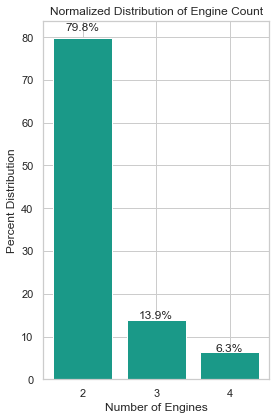

In [47]:
num_engines = df_clean['Number.of.Engines'].value_counts().index.tolist()
num_engines_percent = (df_clean['Number.of.Engines'].value_counts(normalize=True) * 100).values.tolist()

fig, ax = plt.subplots(figsize=(4,6))
ax.bar(num_engines, num_engines_percent, color='#1a9988')
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Percent Distribution')
ax.set_title('Normalized Distribution of Engine Count')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/100:.1%}', (x + width/2, y + height*1.02), ha='center')

plt.tight_layout() 
plt.savefig("./images/engine_count.png", dpi=150)
plt.show();

We are seeing mostly 2 engine planes. It seems that they dominate the market, so we should probably not put too much stake in other engine counts.

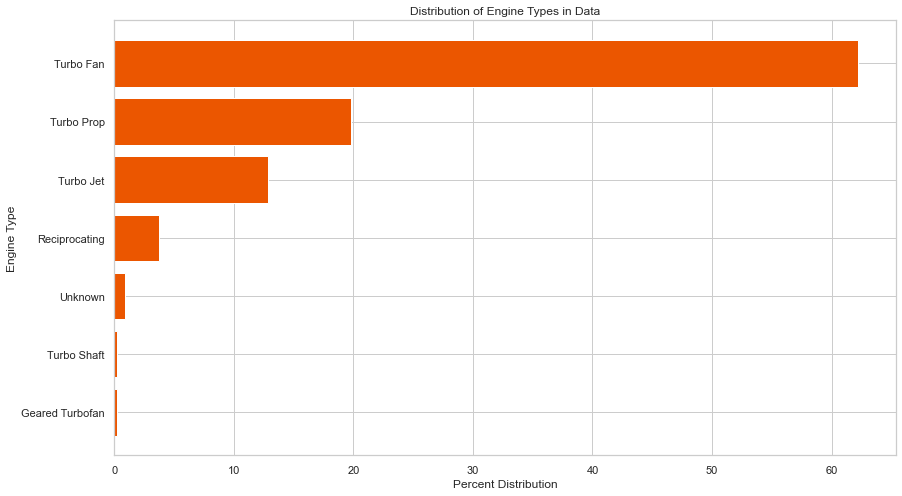

In [48]:
engine_list = df_clean['Engine.Type'].value_counts().index.tolist()
engine_list_percent = (df_clean['Engine.Type'].value_counts(normalize=True)*100).values.tolist()

fig, ax = plt.subplots(figsize=(14,8))
ax.barh(engine_list, engine_list_percent, color='#eb5600')
ax.set_ylabel('Engine Type')
ax.set_xlabel('Percent Distribution')
ax.set_title('Distribution of Engine Types in Data')
ax.invert_yaxis()

plt.savefig("./images/engine_type_2.png", dpi=150)
plt.show();

So we know that most planes in our dataset, and probably in commercial use, are twin turbo fan engines.

#### Top Manufacturers and Distribution

Let's find a useful subset of the manufacturers to filter our visualizations.

In [49]:
df['Manufacturer'].value_counts()

Boeing               938
Mcdonnell Douglas    291
Airbus               177
Beech                111
Embraer              110
Bombardier            96
Douglas               85
Lockheed              38
Cessna                32
Gulfstream            10
Learjet                9
Convair                8
Hawker                 3
Dassault               3
Raytheon               3
Name: Manufacturer, dtype: int64

We need a minimum number of observations to make a useful statisical observation. 100 seems like a good cutoff, and the conveniently leaves us with 5 manufacturers. Let's keep only these. 

In [50]:
# Get a list of the top 5 manufacturers, then create a dataframe with records from only those 5.
# Next, get a normalized distribution of those manufacturers in our dataset.

top_5_list = df_clean['Manufacturer'].value_counts().head().index.tolist()

df_top_manufacturers = df_clean[df_clean['Manufacturer'].isin(top_5_list)]

top_5_percent = df_top_manufacturers['Manufacturer'].value_counts(normalize=True).head().values.tolist()

Let's look at the distribution of these manufacturers within our dataset. 

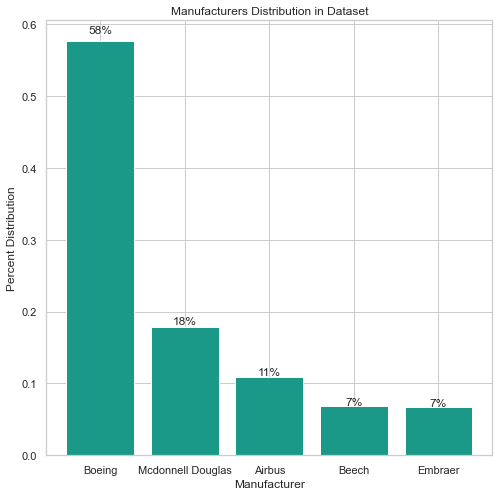

In [51]:
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(top_5_list, top_5_percent, color='#1a9988')
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Percent Distribution')
ax.set_title('Manufacturers Distribution in Dataset')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
    
plt.savefig("./images/manufacturers_distribution.png", dpi=150)
plt.show();

As expected, Boeing makes up about 58% of the data. Let's look at total number of passengers per manufacturer and see if it lines up. 

In [52]:
df_top_manufacturers.groupby('Manufacturer')['Total.Passengers'].sum().sort_values()

Manufacturer
Beech                  1909.0
Embraer                5676.0
Airbus                28521.0
Mcdonnell Douglas     39662.0
Boeing               135788.0
Name: Total.Passengers, dtype: float64

In [53]:
top_5_sorted = df_top_manufacturers.groupby('Manufacturer')['Total.Passengers'].sum().sort_values().index.tolist()
total_passengers = df_top_manufacturers.groupby('Manufacturer')['Total.Passengers'].sum().sort_values().values.tolist()

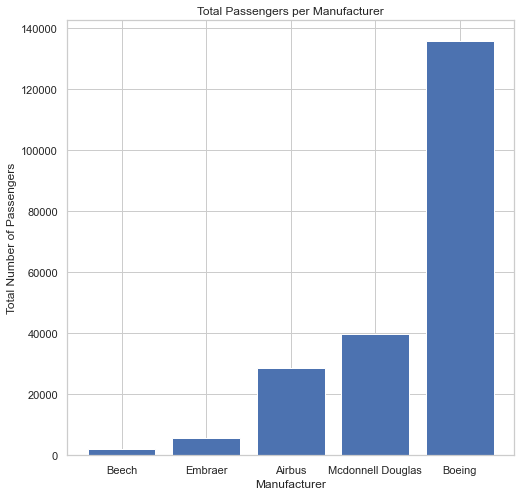

In [54]:
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(top_5_sorted, total_passengers)
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Total Number of Passengers')
ax.set_title('Total Passengers per Manufacturer');

### Injury Rates Per Incident

Let's look at average injury severity per incident across manufacturers.

In [55]:
# Create a new dataframe with total passenger count and total severe injury count grouped by manufacturer

manufacturer_injury_level = df_top_manufacturers[['Total.Passengers','Total.Fatal.Injuries', 
                    'Total.Serious.Injuries', 'Manufacturer']].groupby('Manufacturer').sum()

In [56]:
# Get percentage of severe injury by passenger total

manufacturer_injury_level['Fatal and Serious Percentage'] = ((manufacturer_injury_level['Total.Fatal.Injuries'] 
                                                             + manufacturer_injury_level['Total.Serious.Injuries']) 
                                                             / manufacturer_injury_level['Total.Passengers']) * 100

In [57]:
manufacturer_injury_level.head()

,Total.Passengers,Total.Fatal.Injuries,Total.Serious.Injuries,Fatal and Serious Percentage
Manufacturer,,,,
Airbus,28521.0,266.0,117.0,1.342870
Beech,1909.0,243.0,35.0,14.562598
Boeing,135788.0,1275.0,1018.0,1.688662
Embraer,5676.0,87.0,49.0,2.396054
Mcdonnell Douglas,39662.0,408.0,282.0,1.739700


Here, we see that per accident, Beech has the highest percentage of fatalities or serious injuries at 14% (inversely, it has the smallest percentage of minor or no injuries at 85%). 

#### Let's visualize it: 

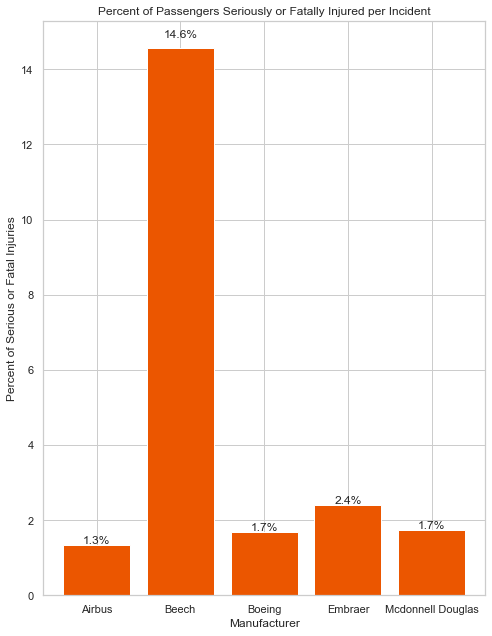

In [58]:
fatal_serious_list = manufacturer_injury_level['Fatal and Serious Percentage'].index.tolist()
fatal_serious_percent = manufacturer_injury_level['Fatal and Serious Percentage'].values.tolist()

fig, ax = plt.subplots(figsize=(7,9))
ax.bar(fatal_serious_list, fatal_serious_percent, color='#eb5600')
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Percent of Serious or Fatal Injuries')
ax.set_title('Percent of Passengers Seriously or Fatally Injured per Incident')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/100:.1%}', (x + width/2, y + height*1.02), ha='center')

plt.tight_layout()
plt.savefig("./images/injury_severity.png", dpi=150)
plt.show();

So we know we don't want a Beech plane. But these others look a little close. Let's look closer to see if there is a observable difference.

In [59]:
manufacturer_injury_level2 = manufacturer_injury_level.drop(index='Beech')

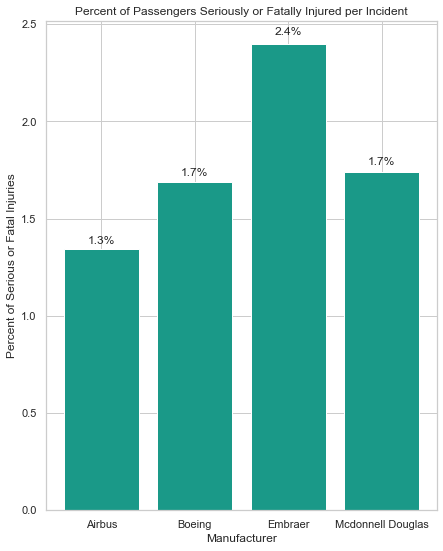

In [60]:
top_5_no_beech = manufacturer_injury_level2.index.tolist()
fatal_serious_percent_no_beech = manufacturer_injury_level2['Fatal and Serious Percentage'].values.tolist()

fig, ax = plt.subplots(figsize=(7,9))
ax.bar(top_5_no_beech, fatal_serious_percent_no_beech, color='#1a9988')
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Percent of Serious or Fatal Injuries')
ax.set_title('Percent of Passengers Seriously or Fatally Injured per Incident')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/100:.1%}', (x + width/2, y + height*1.02), ha='center')
    
plt.savefig("./images/injury_severity_no_beech.png", dpi=150)
plt.show();

Now we can see more clearly - Airbus is the safest option! Out of all incidents included in our data, Airbus incidents result in the least number of serious and fatal injuries, and Embraer the most (behind Beech). We feel comfortable recommending an Airbus plane to our division head.

### Severity of Damage to Aircraft by Manufacturer

Let's take a look at the distribution of aircraft damange per manufacturer. 

In [61]:
df_top_manufacturers['Aircraft.damage'].value_counts()

Undamaged      727
Minor          510
Substantial    333
Destroyed       57
Name: Aircraft.damage, dtype: int64

In [62]:
# Build dictionary of aircraft damage by manufacturer
# We want each manufacturer to contain normalized values for the level of aircraft damage

normalized_damage = {}

for i in top_5_list:
    normalized_damage[i] = df_top_manufacturers[df_top_manufacturers['Manufacturer']
                                                == i]['Aircraft.damage'].value_counts(normalize=True).to_dict()

In [63]:
# Use the new dictionary to create a new data frame

manufacturer_damage_level = pd.DataFrame.from_dict(normalized_damage, orient = 'index')
manufacturer_damage_level

,Undamaged,Minor,Substantial,Destroyed
Boeing,0.491471,0.314499,0.172708,0.021322
Mcdonnell Douglas,0.374570,0.367698,0.226804,0.030928
Airbus,0.542373,0.310734,0.141243,0.005650
Beech,0.108108,0.261261,0.432432,0.198198
Embraer,0.445455,0.218182,0.290909,0.045455


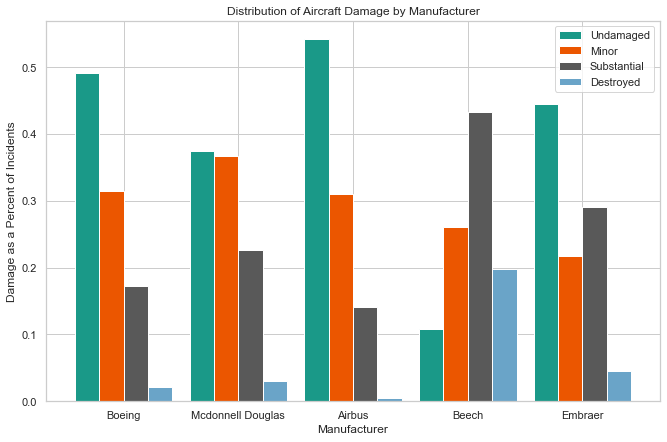

In [64]:
manufacturer_damage_level.plot(kind='bar', xlabel='Manufacturer', ylabel='Damage as a Percent of Incidents', 
                               title='Distribution of Aircraft Damage by Manufacturer', figsize=(11,7), rot=0,
                              width=0.85, color=['#1a9988', '#eb5600', '#595959', '#6aa4c8'])

plt.savefig("./images/aircraft_damage.png", dpi=150)
plt.show();

Based off this, we can see that Beech is once again the most dangerous and expensive option. Airbus again wins the race, showing the least likelihood of an incident resulting in costly damage. 

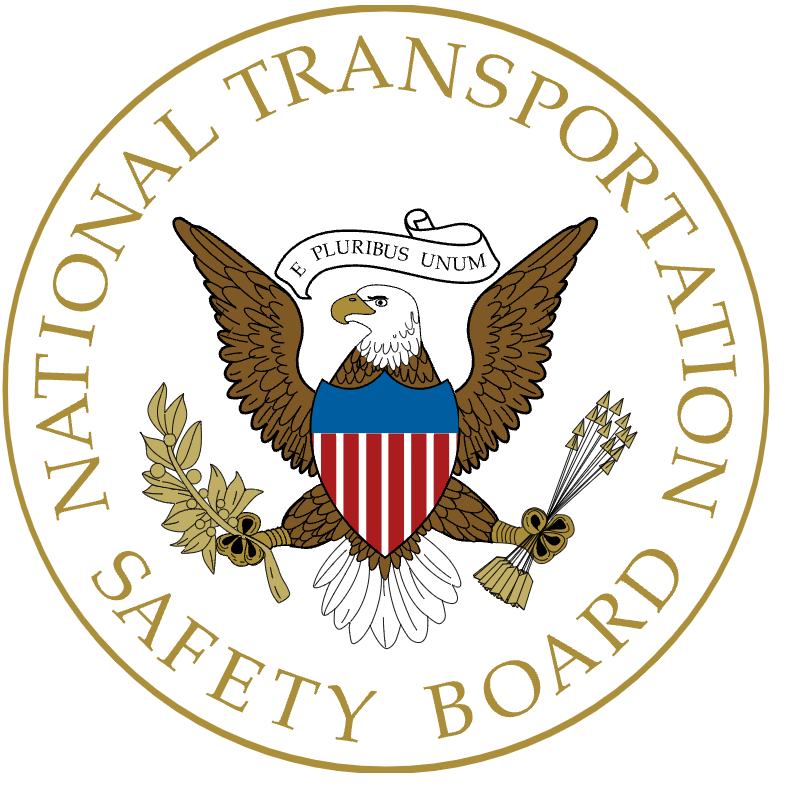

## Conclusions

We can make 3 recommendations to the division head based on our analysis:

- **Buy Airbus planes!** Based on the data we have, incidents involving Airbus planes least often result in serious or fatal injury, and rarely lead to expensive aircraft damage. While incidents may be unavoidable over the long term as an operator of airplanes, they don't have to be catastrophic.
- **Or at least, don't buy Beech!** If Airbus planes are found to be too expensive, look for Boeing or Embraer, but whatever you do, DON'T buy a plane from Beech. Based on our data, 14% of all passengers involved in an incident on a Beech plane were seriously or fatally injured.
- **And definitely make sure to buy a twin engine turbo fan!** If our dataset is at all indicative of the real world, we know that the vast majority of planes used to transport more than 10 passengers are twin engine turbo fans. At the very least, because of their prevalence, they are likely to be the easiest to maintain and service. Let's stick to the script here.

### Next steps

We are left with a few more questions to pursue in the coming months.

- **What is the actual incidence level of an accident in the whole of air travel?** We only have data on records of unsuccessful flights, so we have no way of knowing just how common accidents are across manufacturers or engine types.
- **What is the most profitable airplane to operate?** As we consider which type of plane to operate and for what purpose, we will want to gather much more information to forecast profitability for different business plans. We know that devastating accidents are costly, so we have learned something about this already, but the whole picture is much more broad than that. We need to research pricing across commercial travel and private chartering, fuel efficiency of engine types, fuel costs, route needs, leasing/purchasing costs for different models, the list goes on. 
- **Why are twin engine turbo fans the most common?** Are they fuel efficient? Are they the safest? It's clear that these engines dominate the market, but should we accept this at face value? Or is there an advantage to going against the grain?